In [3]:
from sklearn.datasets import load_boston

boston = load_boston()



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [8]:

import numpy as np
import pandas as pd

columns = ['target'] + list(boston.feature_names)

df = pd.DataFrame(data=np.c_[boston.target, boston.data],
                  columns=columns)

df


,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [27]:
X = df.drop(['target',  'ZN', 'INDUS', 'AGE', 'TAX', 'B'   ], axis=1)
y = df['target']

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [43]:
w0 = model.intercept_
w1 = model.coef_
print('w0 =', w0)
print('CRIM =', w1[0])
print('CHAS =' ,w1[1])
print('NOX =' ,w1[2])
print('RM =' ,w1[3])
print('DIS =' ,w1[4])
print('RAD =' ,w1[5])
print('PTRATIO =' ,w1[6])
print('LSTAT =' ,w1[7])
w1.dtype

w0 = 48.28112321864674
CRIM = -0.13250134707701566
CHAS = 3.6031073096504054
NOX = -27.008729987811375
RM = 3.669773625925053
DIS = -1.4377218518188002
RAD = 0.1562329070759736
PTRATIO = -1.2209002383869834
LSTAT = -0.5611478199971209


dtype('float64')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


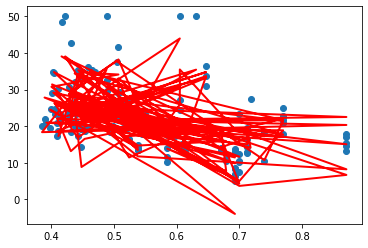

In [41]:
y_pred = model.predict(X_test)
import matplotlib.pyplot as plt

plt.scatter(X_test['NOX'], y_test)
plt.plot( X_test['NOX'] , y_pred  , color='red', linewidth=2);
plt.show()

In [51]:
print('y = ', round(w0,2), ' + ' , round(w1[0],2) , 'CRIM + ' , round(w1[1],2) , 'CHAS + ' , round(w1[2],2) , 'NOX + ' , round(w1[3],2) , 'RM + ' , round(w1[3],2) , 'RM + ' , round(w1[4],2) , 'DIS + ' , round(w1[5],2) , 'RAD + ' , round(w1[6],2) ,'PTRATIO + ', round(w1[7],2) , 'LSTAT', sep ='')

y = 48.28 + -0.13CRIM + 3.6CHAS + -27.01NOX + 3.67RM + 3.67RM + -1.44DIS + 0.16RAD + -1.22PTRATIO + -0.56LSTAT


In [50]:
a = (y_test - y_pred)**2
sum(a)/len(a)

20.022021369144092

In [48]:

y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
# По метрикам видно, что отклонение не огромно, но и не равно 0, на основе этого можно сказать, что модель работает не плохо

Mean Absolute Error: 3.2977133291189564
Mean Squared Error: 20.022021369144095
R2 score: 0.7418909489078178


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
